In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

EJERCICIO 1

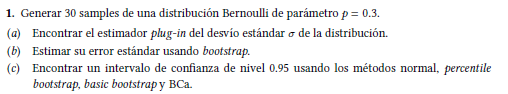

In [6]:
samples = stats.bernoulli.rvs(0.3, size = 30)
print(samples)

[0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0]


In [8]:
p_hat = np.mean(samples)

sigma_hat = np.sqrt(p_hat * (1 - p_hat))

print(p_hat)
print(sigma_hat)

0.3333333333333333
0.4714045207910317


In [10]:
def p_hat(samples):
    return np.sqrt(np.mean(samples) * (1 - np.mean(samples)))

bootstrap = stats.bootstrap((samples,), p_hat, confidence_level= 1 - 0.05)

se = bootstrap.standard_error
print(se)

0.03434249222393647


In [19]:
alpha = 0.05

boot_perc = stats.bootstrap((samples,), p_hat, confidence_level=1-alpha, method="percentile")
boot_basic = stats.bootstrap((samples,), p_hat, confidence_level=1-alpha, method="basic")
boot_bca = stats.bootstrap((samples,), p_hat, confidence_level=1-alpha, method="bca")

low_p, up_p = boot_perc.confidence_interval.low.round(3), boot_perc.confidence_interval.high.round(3)
low_b, up_b = boot_basic.confidence_interval.low.round(3), boot_basic.confidence_interval.high.round(3)
low_c, up_c = boot_bca.confidence_interval.low.round(3), boot_bca.confidence_interval.high.round(3)
low_normal = round(p_hat(samples) - stats.norm.ppf(1-alpha/2) * boot_perc.standard_error, 3)
up_normal = round(p_hat(samples) + stats.norm.ppf(1-alpha/2) * boot_perc.standard_error, 3)


print(f"Percentile method: [{low_p}, {up_p}]")
print(f"Basic method: [{low_b}, {up_b}]")
print(f"BCA method: [{low_c}, {up_c}]")
print(f"Normal approximation: [{low_normal}, {up_normal}]")

Percentile method: [0.373, 0.499]
Basic method: [0.444, 0.57]
BCA method: [0.4, 0.5]
Normal approximation: [0.407, 0.536]


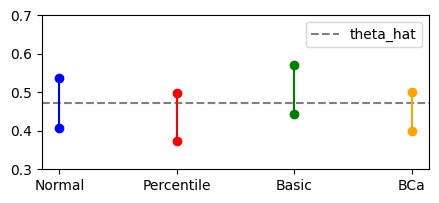

In [21]:
plt.figure(figsize=(5,2))
int_name = ["Normal", "Percentile", "Basic", "BCa"]

plt.axhline(p_hat(samples), color="k", ls="--", label = "theta_hat", alpha=0.5)

plt.plot([1,1], [low_normal, up_normal], "o-", color = "blue")
plt.plot([2,2], [low_p, up_p], "o-", color = "red")
plt.plot([3,3], [low_b, up_b], "o-", color = "green")
plt.plot([4,4], [low_c, up_c], "o-", color = "orange")

plt.xticks([1,2,3,4], labels=int_name)
plt.ylim(0.3,0.7)

plt.legend()
plt.show()


EJERCICIO 3

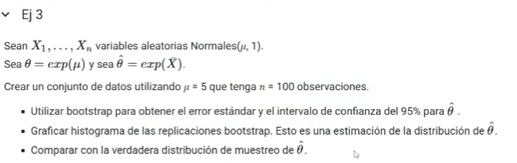


In [3]:
alpha = .05
n = 100
mu = 5

norm_sample = stats.norm.rvs(size=n)
sample = (norm_sample,)

def theta_hat(sample):
    return np.exp(np.mean(sample))

boot_perc = stats.bootstrap(sample, theta_hat, confidence_level= 1-alpha, method="percentile")

boot_basic = stats.bootstrap(sample, theta_hat, confidence_level= 1-alpha, method="basic")

boot_bca = stats.bootstrap(sample, theta_hat, confidence_level= 1-alpha, method="bca")

print("se = ", boot_perc.standard_error)

low_p = boot_perc.confidence_interval.low
up_p = boot_perc.confidence_interval.high

low_b = boot_basic.confidence_interval.low
up_b = boot_basic.confidence_interval.high

low_c = boot_bca.confidence_interval.low
up_c = boot_bca.confidence_interval.high

low_normal = theta_hat(sample) - stats.norm.ppf(1-alpha/2) * boot_perc.standard_error 
up_normal = theta_hat(sample) + stats.norm.ppf(1-alpha/2) * boot_perc.standard_error 

print(f"Percentile method: [{low_p}, {up_p}]")
print(f"Basic method: [{low_b}, {up_b}]")
print(f"BCA method: [{low_c}, {up_c}]")
print(f"Normal approximation: [{low_normal}, {up_normal}]")


se =  0.10596799635244447
Percentile method: [0.8306588773193678, 1.2429112827492526]
Basic method: [0.783434215893126, 1.200133086892221]
BCA method: [0.8239669267545072, 1.235970132742679]
Normal approximation: [0.8051515099659604, 1.2205384226952865]


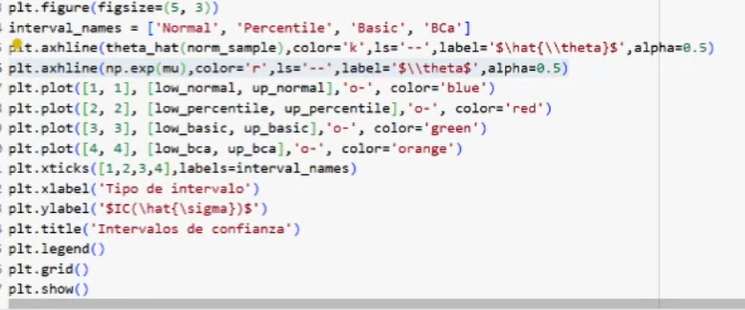

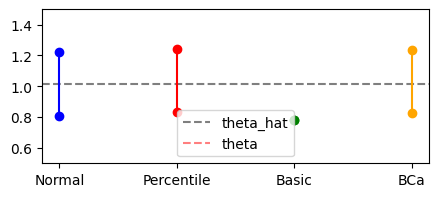

In [4]:
plt.figure(figsize=(5,2))
int_name = ["Normal", "Percentile", "Basic", "BCa"]

plt.axhline(theta_hat(sample), color="k", ls="--", label = "theta_hat", alpha=0.5)
plt.axhline(np.exp(mu), color="r", ls="--", label="theta", alpha = 0.5)

plt.plot([1,1], [low_normal, up_normal], "o-", color = "blue")
plt.plot([2,2], [low_p, up_p], "o-", color = "red")
plt.plot([3,3], [low_b, up_b], "o-", color = "green")
plt.plot([4,4], [low_c, up_c], "o-", color = "orange")

plt.xticks([1,2,3,4], labels=int_name)
plt.ylim(0.5,1.5)

plt.legend()
plt.show()




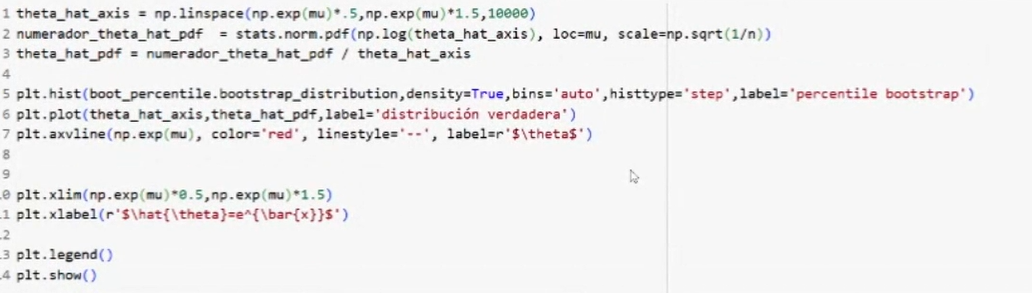